In [48]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

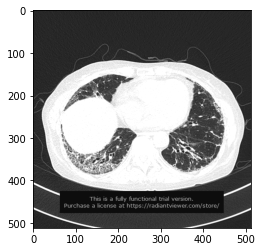

In [49]:
img=cv.imread("test/reticular/0100001.jpg")#转换成灰度图
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

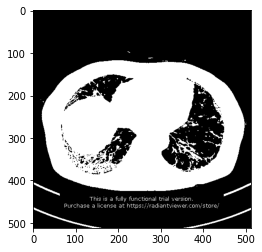

In [50]:
#阈值分割
ret,thresh=cv.threshold(img,127,255,cv.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")

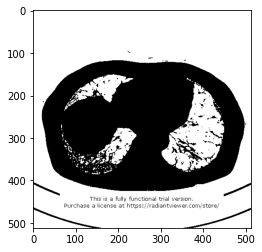

In [51]:
#取反
thresh=~thresh
plt.imshow(thresh,cmap="gray")

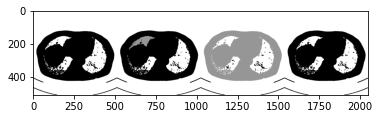

In [52]:
#闭运算
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,4))
closing=cv.morphologyEx(thresh,cv.MORPH_CLOSE,kernel)#先使用一次小核的闭操作消除部分图像内部的小孔
mask=np.zeros([thresh.shape[0]+2,thresh.shape[1]+2],np.uint8)
fill1=closing.copy()
cv.floodFill(fill1,mask=mask,seedPoint=(180,200),newVal=150)
mask2=np.zeros([thresh.shape[0]+2,thresh.shape[1]+2],np.uint8)
fill2=closing.copy()
cv.floodFill(fill2,mask=mask2,seedPoint=(320,200),newVal=150)
mask3=np.zeros([thresh.shape[0]+2,thresh.shape[1]+2],np.uint8)
fill3=closing.copy()
cv.floodFill(fill3,mask=mask3,seedPoint=(200,300),newVal=150)
plt.imshow(np.hstack((closing,fill1,fill2,fill3)),cmap="gray")

In [37]:
print(thresh.shape)
test=np.zeros((512,512),np.uint8)
m=mask[1:mask.shape[0]-1,1:mask.shape[0]-1]+mask2[1:mask2.shape[0]-1,1:mask2.shape[0]-1]+mask3[1:mask3.shape[0]-1,1:mask3.shape[0]-1]
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        if m[i,j]>=1:
            test[i,j]=255
        else:
            test[i,j]=0

(512, 512)


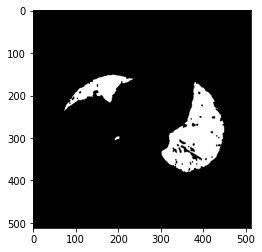

In [38]:
plt.imshow(test,cmap="gray")

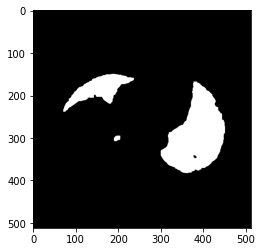

In [39]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
aaa=cv.morphologyEx(test,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔
k=np.ones((5,5),np.uint8)
dilation=cv.dilate(aaa,k,iterations=1)
plt.imshow(dilation,cmap="gray")

In [31]:
#轮廓检测，填满中间的区域
aaa=cv.morphologyEx(test,cv.MORPH_CLOSE,kernel)

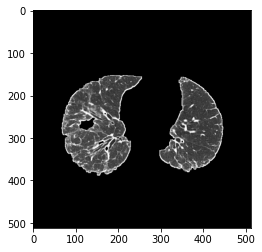

In [32]:
finalResult=np.zeros(img.shape,np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if dilation[i,j]==255:
            finalResult[i,j]=img[i,j]
        else:
            finalResult[i,j]=0
            
plt.imshow(cv.cvtColor(finalResult,cv.COLOR_BGR2RGB))